In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px

In [74]:
df = pd.read_csv("apple_quality.csv")
#Display first 5 Header details
df.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
#checking null values
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df[df['A_id'].isna()==True]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [8]:
#dropping one null values from dataset
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [11]:
#changing the data type for Acidity
df['Acidity']=df['Acidity'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [14]:
df['Quality'].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

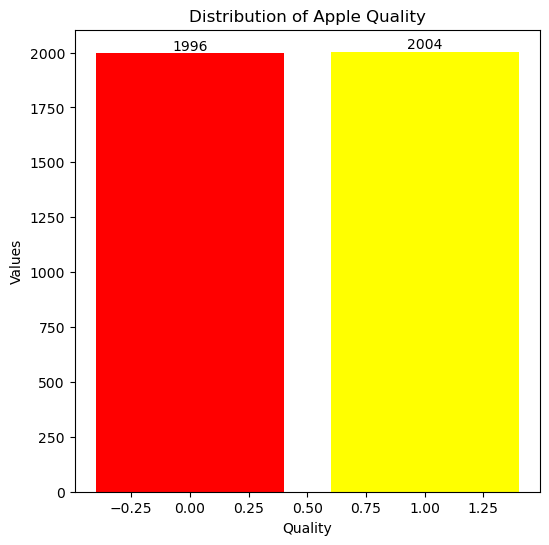

In [28]:
#Checking Distribuition of the apple quality

colors = ['yellow', 'red']
quality_counts = df['Quality'].value_counts()
plt.figure(figsize=(6,6))
bars = plt.bar(quality_counts.index, quality_counts.values, color=['yellow', 'red'])
plt.xlabel('Quality')
plt.ylabel('Values')
plt.title('Distribution of Apple Quality')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
    

plt.show()

1    2004
0    1996
Name: Quality, dtype: int64


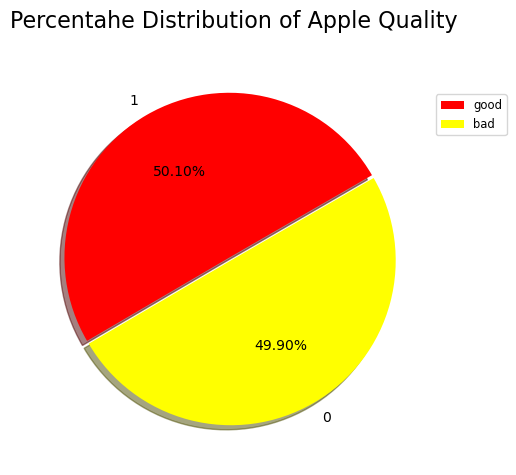

In [30]:

plt.pie(x=df["Quality"].value_counts(), labels=df["Quality"].value_counts().index, shadow=True,
        explode=[0.01, 0.01], startangle=30, autopct='%0.2f%%', colors=["Red", "Yellow"])
plt.legend(labels=["good", "bad"], loc=(1,0.8), fontsize="small")
plt.suptitle("Percentahe Distribution of Apple Quality", fontsize=16)
plt.tight_layout()
print(df.Quality.value_counts())
plt.show()

In [80]:
# Effect on Size and Weight on Quality 
scatter_size_weight = px.scatter(df, x='Size', y='Weight', color='Quality', title='Effect on Size and Weight on Quality ')
scatter_size_weight.show()

In [81]:
# Distribution of Sweetness over Quality 

hist_sweetness = px.histogram(df, x='Sweetness', color='Quality', title='Distribution of Sweetness over Quality')
hist_sweetness.show()

In [20]:
df['Quality'] = df['Quality'].replace({'bad':0,'good':1})
df.Quality

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [50]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0


In [21]:
# drropping irrelevant feature
df.drop('A_id',axis=1,inplace=True)

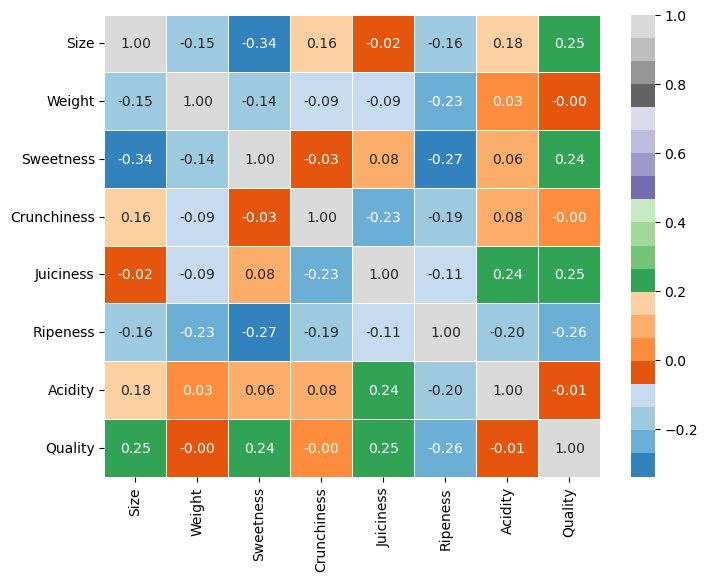

In [67]:
#checking for correlation between variables

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.4, cmap="tab20c")
plt.show()


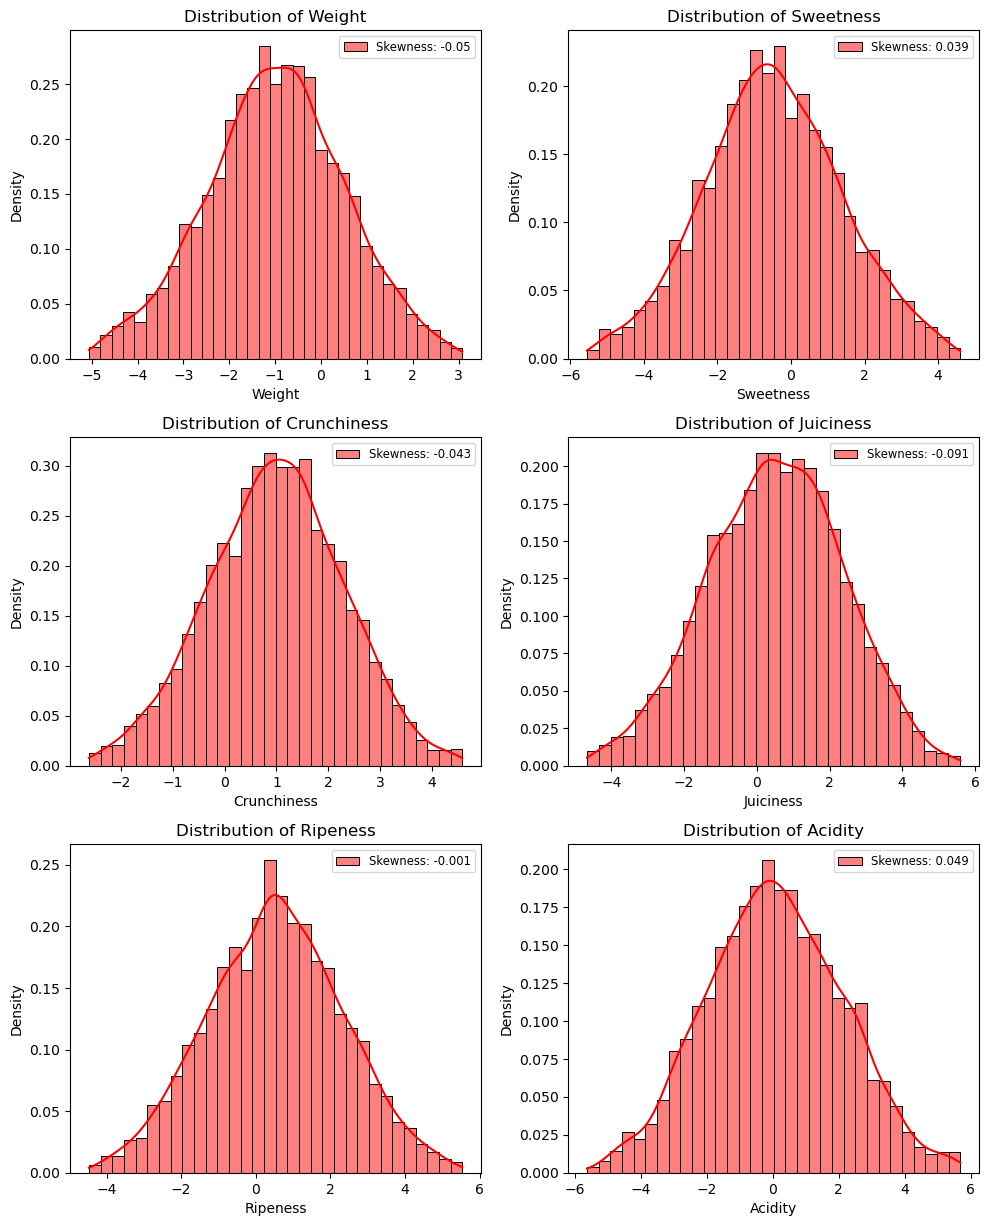

In [48]:
col_pal = sns.color_palette()
plt.figure(figsize=(10, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True, color='red', label=f"Skewness: {df[col].skew().round(3)}", stat='density')
    plt.legend(fontsize="small")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [49]:
# removing outliers
num_cols = df.select_dtypes(include=["float", "int"]).columns[1:-1]
def clean_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    data = data[~((data[column] > upper_limit) | (data[column] < lower_limit))]
    return data

for i in num_cols:
    df = clean_outliers(df, i)

df.shape


(3781, 8)

In [52]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.750330250990753


In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.750330250990753

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       363
           1       0.77      0.74      0.76       394

    accuracy                           0.75       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.75      0.75      0.75       757


Confusion Matrix:
[[276  87]
 [102 292]]


In [54]:
# train with Support Vector Classifier (SVC) and Multi-Layer Perceptron Classifier (MLPC) models 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Train SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict using SVC model
svc_y_pred = svc_model.predict(X_test)

# Evaluate SVC model
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("SVC Accuracy:", svc_accuracy)

# Train MLPC model
mlpc_model = MLPClassifier(random_state=42)
mlpc_model.fit(X_train, y_train)

# Predict using MLPC model
mlpc_y_pred = mlpc_model.predict(X_test)

# Evaluate MLPC model
mlpc_accuracy = accuracy_score(y_test, mlpc_y_pred)
print("MLPC Accuracy:", mlpc_accuracy)


SVC Accuracy: 0.8943196829590488
MLPC Accuracy: 0.9101717305151915


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



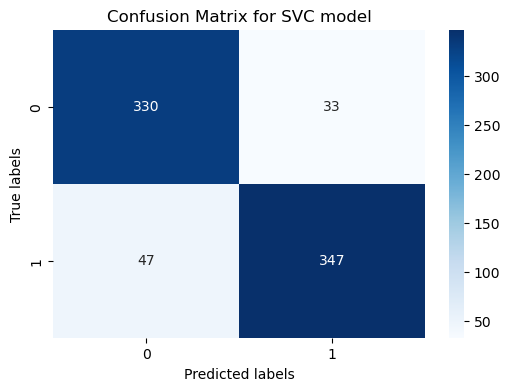

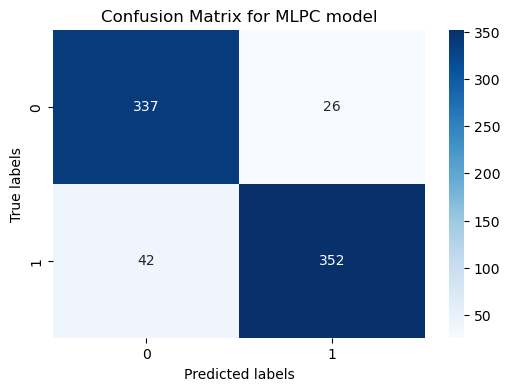

In [64]:
# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

# Plot confusion matrix for SVC model
plot_confusion_matrix(svc_conf_matrix, 'Confusion Matrix for SVC model')

# Plot confusion matrix for MLPC model
plot_confusion_matrix(mlpc_conf_matrix, 'Confusion Matrix for MLPC model')

plt.show()

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for SVC model
svc_scores = svc_model.decision_function(X_test)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_scores)
svc_auc = roc_auc_score(y_test, svc_scores)

# Compute ROC curve and ROC area for MLPC model
mlpc_scores = mlpc_model.predict_proba(X_test)[:, 1]
mlpc_fpr, mlpc_tpr, _ = roc_curve(y_test, mlpc_scores)
mlpc_auc = roc_auc_score(y_test, mlpc_scores)


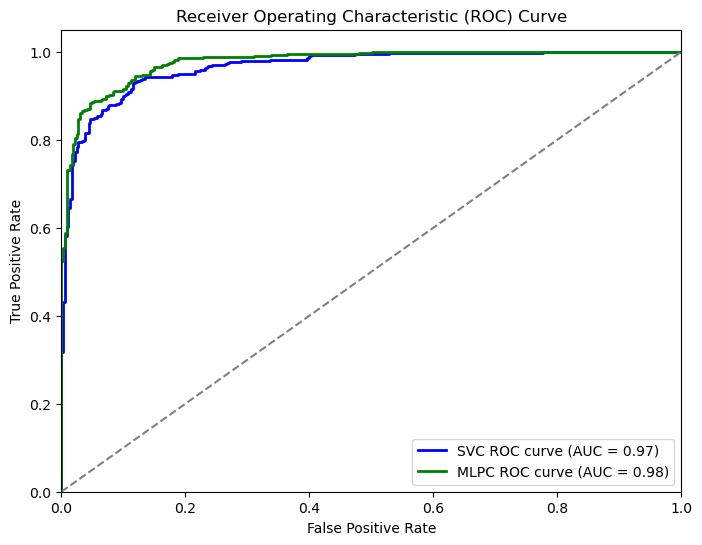

In [66]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(svc_fpr, svc_tpr, color='blue', lw=2, label=f'SVC ROC curve (AUC = {svc_auc:.2f})')
plt.plot(mlpc_fpr, mlpc_tpr, color='green', lw=2, label=f'MLPC ROC curve (AUC = {mlpc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
